##  Detecting Email Spam 

### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import svm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [38]:
df =pd.read_csv(r"C:\Users\tejas\Documents\OIBSIP\spam.csv", encoding='latin1',delimiter=',')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [41]:
df.shape

(5572, 2)

In [42]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df = df.dropna()

In [45]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

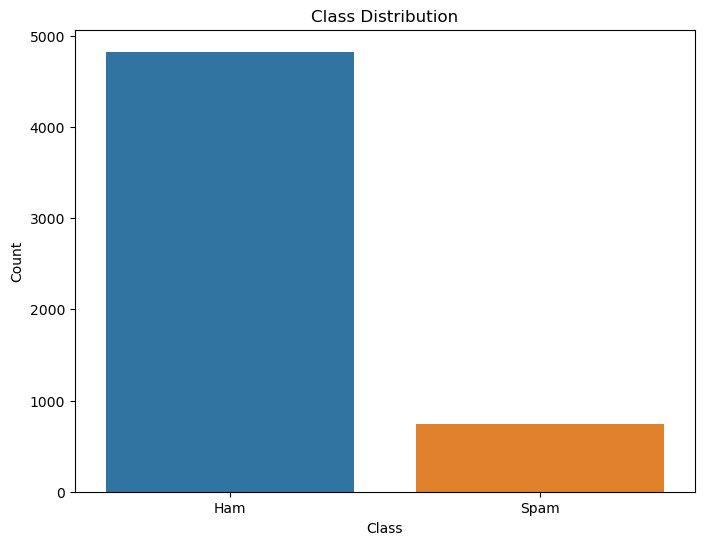

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='v1', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Ham','Spam'])
plt.show()

### Preprocessing

In [48]:
df['v1'] = df['v1'].map({'spam':1, 'ham':0})

In [49]:
X=df['v2']
y=df['v1']

### Training the model

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(4457,)

In [54]:
y_train.shape

(4457,)

In [55]:
X_test.shape

(1115,)

In [56]:
y_test.shape

(1115,)

In [52]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Model Fitting

In [64]:
sv = svm.SVC()
sv.fit(X_train_tfidf, y_train)
y_pred_sv = sv.predict(X_test_tfidf)
score_sv = round(accuracy_score(y_test,y_pred_sv)*100,2)
print("The Accuracy score achieved using SVM is:",score_sv,"%")

The Accuracy score achieved using SVM is: 97.67 %


### Loading the model and Making Predictions

In [65]:
import pickle

In [67]:
pickle.dump(sv, open('email_spam_detect.pkl','wb'))
loaded_model = pickle.load(open('email_spam_detect.pkl','rb'))

In [75]:
input_data = ["Sunshine Quiz Wkly Q! Win a top Pony LED player if u know which country the Algarve is in? Txt ansr to 12345."]

In [77]:
input_data_tfidf = vectorizer.transform(input_data)
prediction = loaded_model.predict(input_data_tfidf)

if prediction[0] == 1:
    print("The email is classified as spam.")
else:
    print("The email is classified as ham.")

The email is classified as spam.
